# **DON'T PREDICT STOCK RETURN USING LSTM**

### **Why This Project?**

- A lot of resources out there claim to be able to predict stock prices using LSTM.
- you should ask yourself how many of them actually tried this LSTM model with their own money in real world.
- if they are able to predict stock price why they are not able make more money with their own money.
- some might even joined course on the site because you thought it would teach you to predict.
- if you are beignner, it easy to believe deep learning can do anything.
- they think extrapolating future stock price using histroical stock prices is possible with magical LSTM model.
- unfortunatly, if you believe that you have fallen into a marketing trap.
- this project is really about fixing this incorrect thinking.


#### **Import Libraries**


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


from tensorflow.keras.layers import Dense, Input, LSTM, GRU, SimpleRNN, GlobalMaxPooling1D
from tensorflow.keras.models  import Model
from tensorflow.keras.optimizers import Adam, SGD


### **Data we are using**

- we are using starbucks daily stock price  from 2013 to 2018.
- here are the info about columns of that data.
- **date**: date 
- **open**: stock price of the SBUX on opening of that day
- **high**: maximum stock price of the SBUX on that day
- **low**: minimum stock price of the SBUX on that day
- **close**: stock price of the SBUX on closing of that day
- **volume**: numbe of shares traded that day

In [2]:
#Read Data using pandas
df = pd.read_csv('sbux.csv')

In [3]:
#to view first five rows
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [4]:
#to view last five rows 
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


### **MODEL_1:-Start doing wrong thing - trying to predict the price itself**

In [5]:
#taking closing  stock price and coverting into series of values
#converting single column to 2D-NumPy array
series = df['close'].values.reshape(-1, 1)

In [6]:
#Standardise the data
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

#### **Build Dataset for DL model**

In [7]:
##build the data set
##let's see if we can predict last T values to predict next value
T = 10
D = 1
X = []
Y = []

#for loop to insert values into X, Y
for t in range(len(series) - T):
    X.append(series[t:t+T])
    Y.append(series[t+T])

#reshape X into array of shape N x T x D
X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = len(X)
print(N)
print("X shape: ", X.shape, "Y shape: ", Y.shape)

1249
X shape:  (1249, 10, 1) Y shape:  (1249,)


#### **Build and Train Model**

In [8]:
# Model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1)
)

#train the data
r = model.fit(X[:-N//2], Y[:-N//2],
               epochs=80, 
               validation_data=(X[-N//2:], Y[-N//2:]))



Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3528 - val_loss: 0.5474
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0266 - val_loss: 0.0716
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - val_loss: 0.0587
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - val_loss: 0.0295
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - val_loss: 0.0543
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - val_loss: 0.0401
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0321
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - val_loss: 0.0405
Epoch 9/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0932
Epoch 10/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - val_loss: 0.0292
Epoch 11/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - val_loss: 0.0245
Epoch 12/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - val_l

#### **Plot Loss per epoch**


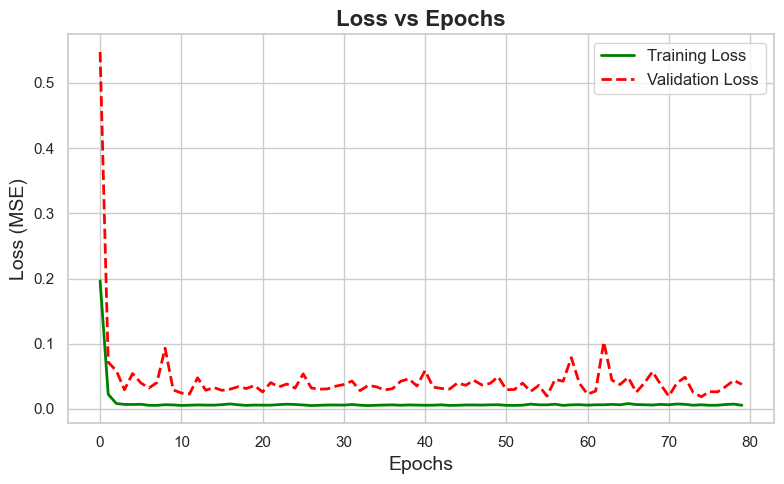

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(8, 5))

# Plot loss curves
sns.lineplot(x=range(len(r.history["loss"])), y=r.history["loss"], label="Training Loss", color="green", linewidth=2)
sns.lineplot(x=range(len(r.history["val_loss"])), y=r.history["val_loss"], label="Validation Loss", color="red", linewidth=2, linestyle="--")

# Titles and labels
plt.title("Loss vs Epochs", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss (MSE)", fontsize=14)

# Legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


- From this plot, I’d summarize the model’s performance like this:
- **Good fit** – Training loss drops quickly and stays very low (~0.01).
- **Generalizes well** – Validation loss is close to training loss and does not trend upward over time.
- **Some noise** – Small spikes in validation loss suggest occasional difficulty on certain validation samples.
- **No severe overfitting** – The gap between training and validation loss remains small across all epochs.


#### **One Step Forecast Using true Targets**

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(1249, 1)


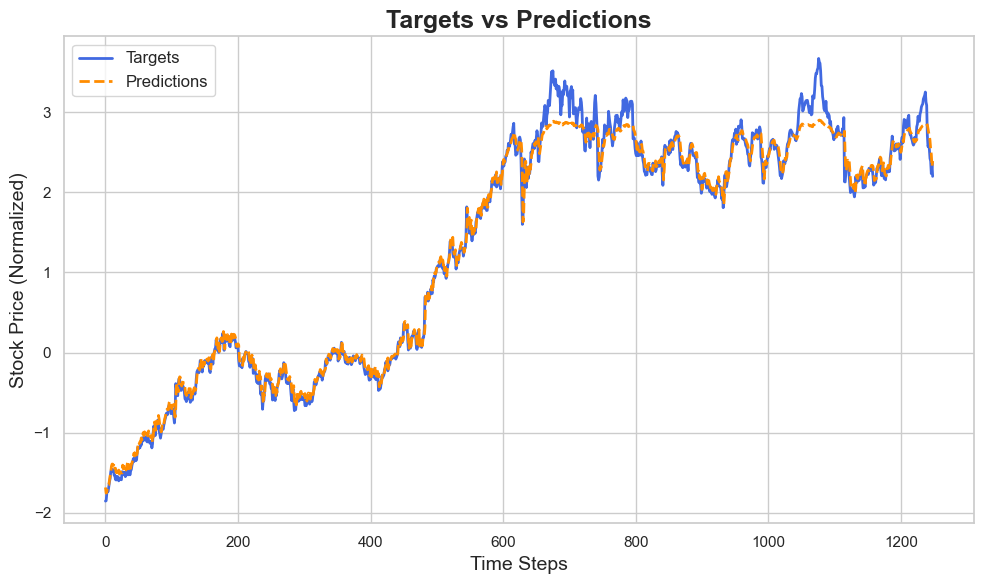

In [10]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(10, 6))

# Plot targets and predictions
sns.lineplot(x=range(len(Y)), y=Y, label="Targets", color="royalblue", linewidth=2)
sns.lineplot(x=range(len(predictions)), y=predictions, label="Predictions", color="darkorange", linewidth=2, linestyle="--")

# Titles and labels
plt.title("Targets vs Predictions", fontsize=18, fontweight='bold')
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Stock Price (Normalized)", fontsize=14)

# Legend
plt.legend(fontsize=12, loc="best")

# Tight layout for better spacing
plt.tight_layout()


**Insights**

How it works:
For each prediction, the model uses the actual, true previous values from the dataset as input.
Result:
The model always has the correct context/history, so errors do not accumulate.
This makes the predictions look very accurate and closely follow the true values.
But:
This is not realistic for real-world forecasting, because in practice, you won’t have access to future true values when making predictions.

#### **Multistep Forecasting**

In [11]:
validation_targets = Y[-N//2:]
validation_prediction = []

#last train input dataset
last_x = X[-N//2]

while len(validation_prediction) < len(validation_targets):

    p = model.predict(last_x.reshape(1, T, 1))[0,0]

    #update the prediction value
    validation_prediction.append(p)

    #make the new_input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

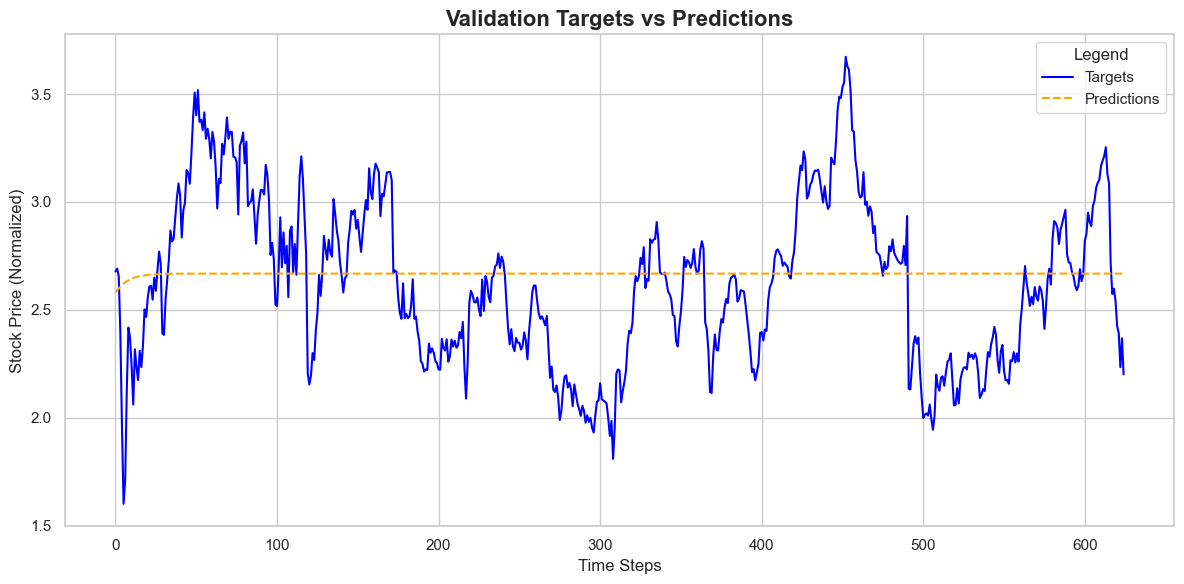

In [12]:
df = pd.DataFrame({
    "Time": range(len(validation_targets)),
    "Validation Targets": validation_targets,
    "Validation Predictions": validation_prediction
})

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot each line
sns.lineplot(data=df, x="Time", y="Validation Targets", label="Targets", color="blue")
sns.lineplot(data=df, x="Time", y="Validation Predictions", label="Predictions", color="orange", linestyle="--")

# Title and labels
plt.title("Validation Targets vs Predictions", fontsize=16, fontweight="bold")
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Stock Price (Normalized)", fontsize=12)
plt.legend(title="Legend")
plt.tight_layout()

plt.show()

**Insights**

How it works:
The model predicts the next value, then uses its own prediction as input for the next step, and so on.
Result:
Any error in a prediction gets fed back into the model for the next prediction.
These errors accumulate and can quickly grow, causing the predictions to drift away from the true values.
This is realistic:
In real-world forecasting, you must rely on your own previous predictions for future steps, so this method better reflects actual performance.

#### **Overall Insights**

- One-step prediction of stock price is misleading and unconventional. In finance, it is more meaningful to predict returns or price changes rather than the absolute price, because prices are non-stationary and affected by many external factors.
- One-step prediction appears more accurate than multistep forecasting because it uses true historical data for each prediction, while multistep forecasting relies on its own previous predictions, causing errors to accumulate.
- Multistep forecasting is more realistic for real-world applications, as it simulates how a model would perform when making consecutive predictions without access to true future values.
- Predicting direct stock prices can lead to overfitting and poor generalization, as models may simply learn to follow the trend rather than capture meaningful patterns.


### **MODEL_2:-Conventional way to predict STOCK RETURN**

**Stock Return(R)**

$$
R = \frac{V_{\text{final}} - V_{\text{initial}}}{V_{\text{initial}}}
$$

- R is Stock Return
- V inital is closing stock price of the previous day
- V final is closing  stock price on that day 


#### **Building Dataset for Model** 

In [14]:
#Read Data using pandas
df = pd.read_csv('sbux.csv')

In [15]:
##calculating stock return by first shifting the data
df["PrevClose"] = df['close'].shift(1)

In [16]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [17]:
df['Return'] = (df['close']-df["PrevClose"]) / df['PrevClose'] 

In [18]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


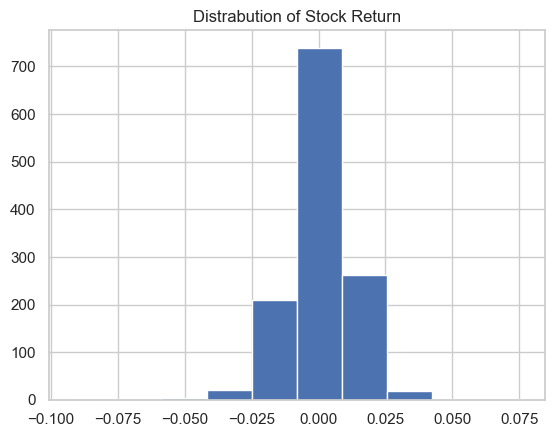

In [19]:
#Distrabution of Stock return
df['Return'].hist()
plt.title("Distrabution of Stock Return");

In [20]:
#preparig sequence of data for LSTM Model
#Normalizing Data
series = df['Return'].values[1:].reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [21]:
##build the data set
##let's see if we can predict last T valuues to predict next value
T = 10
D = 1
X = []
Y = []

#for loop to insert values into X, Y
for t in range(len(series) - T):
    X.append(series[t:t+T])
    Y.append(series[t+T])

#reshape X into array of shape N x T x D
X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = len(X)
print(N)
print("X shape: ", X.shape, "Y shape: ", Y.shape)

1248
X shape:  (1248, 10, 1) Y shape:  (1248,)


#### **Build Model and Train**

In [22]:
#Build Model
i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1)(x)

model = Model(i, x)

model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01)

)

#train the data
r = model.fit(X[:-N//2], Y[:-N//2],
               epochs=80, 
               validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.9533 - val_loss: 1.1478
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0179 - val_loss: 1.1519
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1147 - val_loss: 1.1356
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0118 - val_loss: 1.1485
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9866 - val_loss: 1.1540
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9980 - val_loss: 1.1419
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0332 - val_loss: 1.1491
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0499 - val_loss: 1.1503
Epoch 9/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9559 - val_loss: 1.1475
Epoch 10/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1715 - val_loss: 1.1620
Epoch 11/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9442 - val_loss: 1.1527
Epoch 12/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9664 - val_l

#### **Loss vs Epochs Plot**

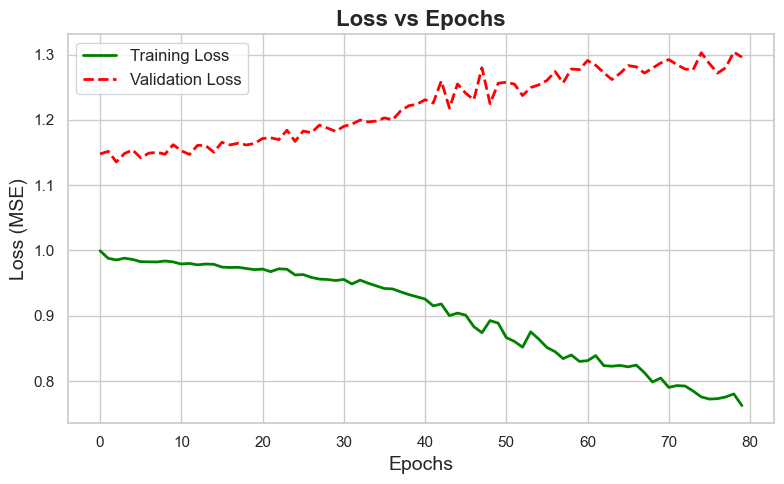

In [23]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(8, 5))

# Plot loss curves
sns.lineplot(x=range(len(r.history["loss"])), y=r.history["loss"], label="Training Loss", color="green", linewidth=2)
sns.lineplot(x=range(len(r.history["val_loss"])), y=r.history["val_loss"], label="Validation Loss", color="red", linewidth=2, linestyle="--")

# Titles and labels
plt.title("Loss vs Epochs", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss (MSE)", fontsize=14)

# Legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

- Training Loss (green) steadily drops close to zero after ~100 epochs — this means this model is learning the training set extremely well (maybe too well).
- Validation Loss (red) instead of decreasing, starts increasing after a short while, and keeps rising — a clear sign of overfitting.
- The point where validation loss starts climbing is your early stopping point — training beyond this isn’t improving generalization, only memorizing noise in the training set.

#### **One Step Forecasting**

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Otput Shape: (1248, 1)


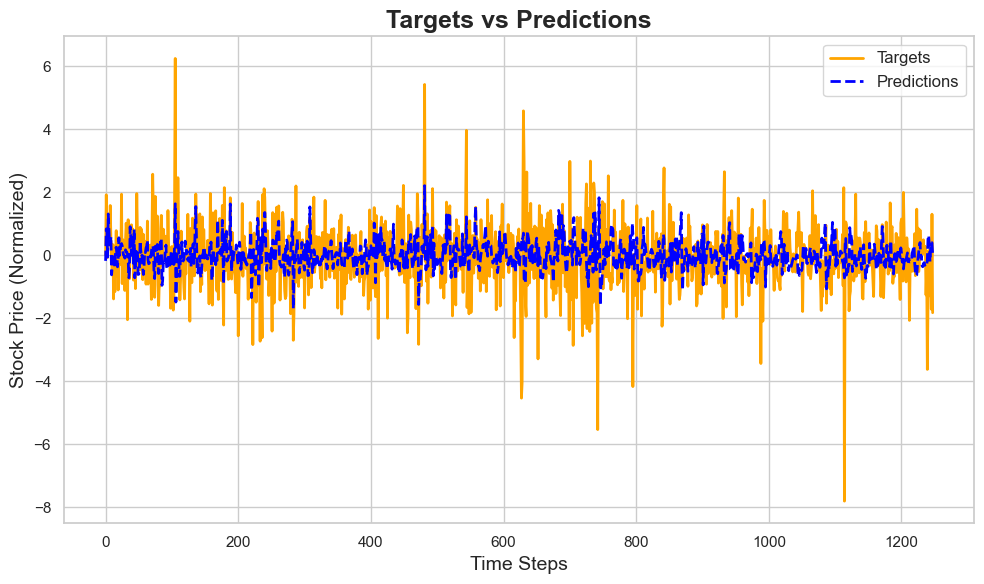

In [24]:
#Predicted  values
outputs = model.predict(X)
print("Otput Shape:", outputs.shape)
predictions = outputs[:, 0]

sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(10, 6))

# Plot targets and predictions
sns.lineplot(x=range(len(Y)), y=Y, label="Targets", color="orange", linewidth=2)
sns.lineplot(x=range(len(predictions)), y=predictions, label="Predictions", color="blue", linewidth=2, linestyle="--")

# Titles and labels
plt.title("Targets vs Predictions", fontsize=18, fontweight='bold')
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Stock Price (Normalized)", fontsize=14)

# Legend
plt.legend(fontsize=12, loc="best")

# Tight layout for better spacing
plt.tight_layout()

- **One-Step Forecasting:**
  - The model appears to predict stock returns very accurately, with predictions closely matching the true values.
  - This is because, at each step, the model uses the actual previous returns as input, so errors do not accumulate.
  - However, this approach is **not realistic for real-world forecasting**—in practice, you won’t have access to future true returns when making predictions.
  - One-step forecasting can give a **false sense of model accuracy** and may overestimate real-world performance.

#### **Multistep Forecasting**

In [25]:
##Multistep forecasting
validation_targets = Y[:-N//2]
validation_prediction = []

# last train input
last_x = X[-N//2]

while len(validation_targets) > len(validation_prediction):
    p = model.predict(last_x.reshape(1, T, 1))[0,0]

    validation_prediction.append(p)

    last_x = np.roll(last_x, -1)
    last_x[-1] = p



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

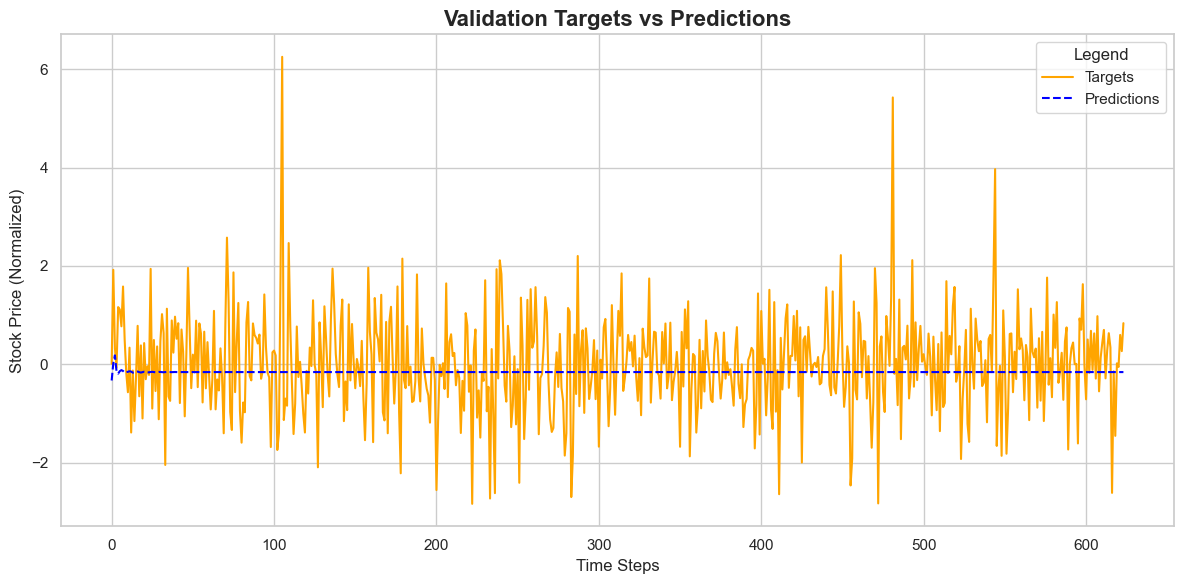

In [26]:
df = pd.DataFrame({
    "Time": range(len(validation_targets)),
    "Validation Targets": validation_targets,
    "Validation Predictions": validation_prediction
})

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot each line
sns.lineplot(data=df, x="Time", y="Validation Targets", label="Targets", color="orange")
sns.lineplot(data=df, x="Time", y="Validation Predictions", label="Predictions", color="blue", linestyle="--")

# Title and labels
plt.title("Validation Targets vs Predictions", fontsize=16, fontweight="bold")
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Stock Price (Normalized)", fontsize=12)
plt.legend(title="Legend")
plt.tight_layout()

plt.show()

- **Multistep Forecasting:**
  - The model uses its own previous predictions as input for future steps, just as it would in a real deployment.
  - Errors from each prediction accumulate and can quickly grow, causing predictions to drift away from the true returns.
  - This method **better reflects actual model performance** in practice and highlights the true difficulty of forecasting stock returns.
  - Multistep forecasting often looks much worse than one-step, but it is a more honest and realistic evaluation.



### **MODEL_3:-Classification Model**

#### **Introduction**

After exploring regression-based approaches for predicting stock prices and returns, we now shift focus to a classification task. Instead of forecasting the exact value of future returns, the goal of the classification model is to predict the **direction** of the stock return—whether it will be positive (up) or negative (down) on the next day.

For this, we use multiple features from the dataset, including `open`, `high`, `low`, `close`, and `volume` prices, to provide the model with more information about the market's recent behavior. The model is trained to output a binary label:  
- **1** if the return is positive (stock goes up)  
- **0** if the return is negative (stock goes down)

This approach is more aligned with practical trading strategies, where knowing the direction of price movement is often more useful than predicting the exact value. However, as with regression, predicting stock direction remains a challenging task due to the noisy and efficient nature of

#### **Data for DL Model**

In [28]:
#Read Data using pandas
df = pd.read_csv('sbux.csv')

##calculating stock return by first shifting the data
df["PrevClose"] = df['close'].shift(1)

df['Return'] = (df['close']-df["PrevClose"]) / df['PrevClose'] 

In [29]:
#Now turn the whole data into numpy array
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values
 

In [30]:
#Now make the actual data which will go into Neural Network
T = 10 #the number of time steps to look back to predict following day output
D = input_data.shape[1] #Number of futures 
N = len(input_data) - T

In [31]:
#Normalize the data
NTrain = len(input_data) * 2//3
scaler = StandardScaler()
scaler.fit(input_data[:NTrain+T])
input_data = scaler.transform(input_data)

In [32]:
#setup X-train and Y-train data
X_train = np.zeros((NTrain, T, D))
Y_train = np.zeros(NTrain)

for t in range(NTrain):
    X_train[t, :, :] = input_data[t:t+T]
    Y_train[t] = (targets[t + T] > 0)

In [33]:
#setup X_test and Y_test Data 
X_test = np.zeros((N-NTrain, T, D))
Y_test = np.zeros(N - NTrain)

for u in range(N-NTrain):
    t = u + NTrain
    X_test[u, :, :] = input_data[t:t + T]
    Y_test[u] = (targets[t+T] > 0)

#### **Build Model and Train**

In [34]:
#make The LSTM model
i = Input(shape=(T,D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)



In [35]:
r = model.fit(X_train, Y_train,
          batch_size=32,
          epochs=300,
          validation_data = (X_test, Y_test))

Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4558 - loss: 0.7107 - val_accuracy: 0.4854 - val_loss: 0.7075
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4638 - loss: 0.7045 - val_accuracy: 0.4854 - val_loss: 0.6971
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5074 - loss: 0.6945 - val_accuracy: 0.4854 - val_loss: 0.7089
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5155 - loss: 0.6958 - val_accuracy: 0.4902 - val_loss: 0.6958
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5295 - loss: 0.6898 - val_accuracy: 0.5293 - val_loss: 0.6910
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5441 - loss: 0.6872 - val_accuracy: 0.5049 - val_loss: 0.6925
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5019 - loss: 0.6942 - val_accuracy: 0.4829 - val_loss: 0.6954
Epoch 8/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5301 - loss: 0.6901 - val_accuracy: 0.5512 - 

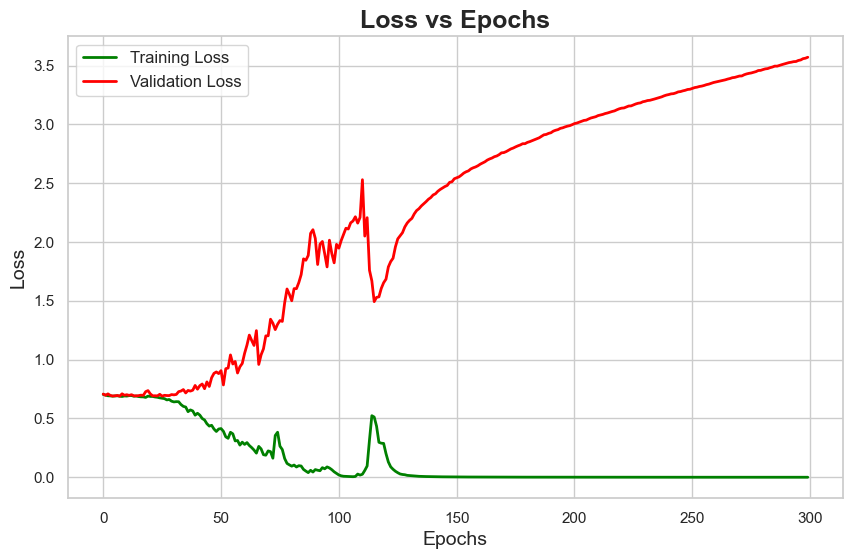

In [36]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# Training loss
sns.lineplot(
    x=range(len(r.history['loss'])), 
    y=r.history['loss'], 
    label="Training Loss", 
    color="green", 
    linewidth=2
)

# Validation loss
sns.lineplot(
    x=range(len(r.history['val_loss'])), 
    y=r.history['val_loss'], 
    label="Validation Loss", 
    color="red", 
    linewidth=2
)

# Title & labels
plt.title("Loss vs Epochs", fontsize=18, weight='bold')
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

# Legend
plt.legend(fontsize=12, title_fontsize=13)

# Show
plt.show()


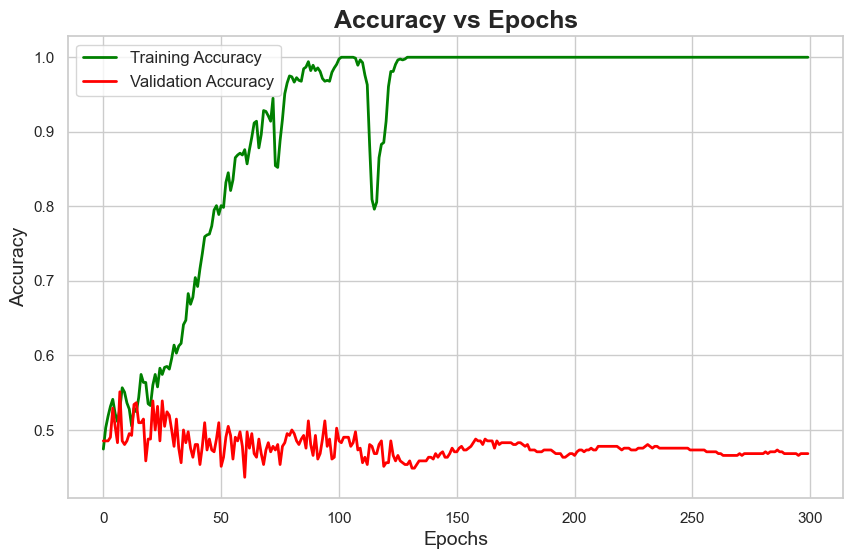

In [37]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plot training accuracy
sns.lineplot(
    x=range(len(r.history['accuracy'])),
    y=r.history['accuracy'],
    label="Training Accuracy",
    color="green",
    linewidth=2
)

# Plot validation accuracy
sns.lineplot(
    x=range(len(r.history['val_accuracy'])),
    y=r.history['val_accuracy'],
    label="Validation Accuracy",
    color="red",
    linewidth=2
)

# Titles & labels
plt.title("Accuracy vs Epochs", fontsize=18, weight='bold')
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

# Legend
plt.legend(fontsize=12, title_fontsize=13)

# Show
plt.show()


#### **Insights from Loss and Accuracy Graphs for the Classification Model**

- **Loss Graph:**
  - The training loss steadily decreases over epochs, indicating that the model is learning patterns from the training data.
  - The validation loss may initially decrease but often starts to increase after a certain point, which is a sign of overfitting. This means the model is starting to memorize the training data rather than generalizing to new, unseen data.
 

- **Accuracy Graph:**
  - Training accuracy increases over time, showing that the model is correctly classifying more samples from the training set as training progresses.
  - Validation accuracy may also increase at first but can plateau or even decrease if the model overfits.
 
**Overall:**  
The graphs help you monitor both learning progress and overfitting. Ideally, both training and validation accuracy should be high and close to each other, and both losses should be low and not diverging. 

### **Conclusion**

- **Model_1** tried to predict future stock prices from past stock prices with LSTM, but it only appears to work well in unrealistic one-step forecasting. In real-world, multistep forecasting, performance drops sharply.
- **Model_2** tried to predict future stock returns but couldn't do well. This is expected, as stock returns are highly random and noisy, and even the best models struggle due to the lack of predictive signal in past prices alone.
- **Model_3** uses all 5 columns for binary classification, but this also fails. If accuracy is close to 50%, it means the model is not better than random guessing, which is typical for stock direction prediction.
- Even with a large amount of data, the model still doesn't do better than random guessing. Predicting stock movement is not a "simple" task—financial markets are complex, non-stationary, and often unpredictable.
- There was little hope for Model_1 and Model_2 to succeed, as no model can consistently beat the market using only past prices, especially with simple architectures and features.
- If we can't predict whether the stock will go up or down, it is even harder to predict the actual value of the price.
- Be suspicious whenever you see almost-perfect stock price predictions—overfitting or unrealistic evaluation (like one-step with true targets) can make models look perfect when they are not.
- Note that real-world events, news, and investor sentiment have a huge impact on stock prices, which are not captured by past price data alone.
- For example, Facebook being investigated by the government can cause its stock to go down, while a new invention in SpaceX can cause its stock price to go up.
- There are many real-world events that will influence stock prices of specific companies, beyond what any model can capture from